# <div style="text-align:center">3η Εργασία</div>

Στην παρούσα εργασία θα ασχοληθείτε με την πρόβλεψη μουσικού είδους από σήματα
μουσικής με τη χρήση νευρωνικών δικτύων. Πιο συγκεκριμένα, ο στόχος της εργασία είναι
να ταξινομήσουμε 1 δευτερόλεπτο μουσικού σήματος στα εξής είδη: κλασσική μουσική, ποπ,
ροκ, και μπλουζ. Για κάθε 1 δευτερόλεπτο σας παρέχονται δύο ειδών αναπαραστάσεις του
ηχητικού σήματος: (i) MFCCs, και (ii) mel-spectograms. <br><br>
Τα MFCCs είναι συντελεστές του φάσματος ισχύος μετασχηματισμένοι με βάση την κλίμακα
mel, μία κλίμακα που είναι κοντά στον τρόπο που αντιλαμβάνεται ο άνθρωπος τα ηχητικά
σήματα μέσω της ακοής. Στην δική μας περίπτωση χρησιμοποιούμε 13 συντελεστές οι οποίοι
υπολογίζονται για κάθε 50 msec και επομένως για κάθε μουσικό κομμάτι του dataset
προκύπτει μία ακολουθία από 20 feature vectors διάστασης 13. Για να αναπαραστήσουμε
αυτή την πληροφορία μέσω ενός στατικού διανύσματος, το οποίο είναι ευκολότερο στην
χρήση, υπολογίζουμε για κάθε έναν από τους 13 συντελεστές την μέση τιμή και την τυπική
του απόκλιση από την ακολουθία των 20 χρονικών στιγμών. Καταλήγουμε λοιπόν με ένα
διάνυσμα 26 χαρακτηριστικών για κάθε μουσικό κομμάτι του dataset. <br><br>
To φασματογράφημα (spectrogram), που είναι ο δεύτερος τρόπος αναπαράστασης που θα
χρησιμοποιήσουμε, είναι μία δισδιάστατη αναπαράσταση που δείχνει την χρονική εξέλιξη
του φάσματος συχνοτήτων. Εάν στο spectrogram εφαρμόσουμε την κλίμακα mel, παίρνουμε
το mel-spectrogram ή melgram με το οποίο και θα δουλέψουμε στην παρούσα εργασία.<br><br>
Υπολογίζοντας και αντιστρέφοντας τους άξονες χρόνου και συχνότητας, προκύπτει για κάθε
στοιχείο του συνόλου δεδομένων ένας πίνακας 21 (χρόνος) x 128 (συχνότητα).<br><br>
Τα δεδομένα που θα χρησιμοποιήσετε βρίσκονται εδώ και είναι χωρισμένα στα σύνολα
training (3200 δείγματα), validation (800 δείγματα) και test (1376 δείγματα) sets, τα οποία
θα χρησιμοποιηθούν για εκπαίδευση, εύρεση υπερπαραμέτρων και αξιολόγηση της
ικανότητας γενίκευσης αντίστοιχα.<br><br>
Ακολουθήστε τις οδηγίες των παρακάτω ερωτημάτων και ετοιμάστε τις απαντήσεις σας
τρέχοντας τον κώδικά σας στο Google Colab. Το framework που θα πρέπει να χρησιμοποιηθεί
για τον προγραμματισμό των νευρωνικών είναι υποχρεωτικά το Pytorch.



### <div style="text-align:center"> [Ερώτημα 1: Feedforward Neural Network] </div>
*Βήμα 1: Φόρτωση δεδομένων (mfccs)* <br><br>
Ξεκινάμε φορτώνοντας τα mfcc δεδομένα για train, validation και test μέσω των αντίστοιχων
numpy αρχείων X.npy και labels.npy. Στην συνέχεια μετασχηματίζουμε τα labels από strings
(classical, blues etc) σε ακέραιους αριθμούς από 0 μέχρι 3, κρατώντας το αντίστοιχο mapping
από τα ονόματα των κλάσεων στους ακεραίους. Τέλος φορτώνουμε τα δεδομένα μας σε 3
Pytorch dataloaders (ένα για κάθε σύνολο δεδομένων) με batch size 16, ώστε να μπορούν
να χρησιμοποιηθούν στα μοντέλα μας. Δώστε επίσης το όρισμα shuffle=True στους train και
validation dataloaders.<br><br>
*Βήμα 2: Ορισμός Νευρωνικού Δικτύου*<br><br>
Ορίστε μία κλάση πλήρως συνδεδεμένου Νευρωνικού Δικτύου (fully connected neural
nework) το οποίο να αποτελείται από τα 4 επίπεδα με αριθμούς νευρώνων 26, 128, 32 και 4
αντίστοιχα, όπου 26 είναι η διάσταση της εισόδου και 4 ο αριθμός των κλάσεων που θα
προβλεφθούν.<br><br>
*Βήμα 3: Ορισμός διαδικασίας εκπαίδευσης*<br><br>
Ορίστε μία συνάρτηση που θα είναι αρμόδια για την εκπαίδευση του δικτύου. Συγκεκριμένα,
δεδομένου ενός αριθμού εποχών, ενός optimizer, ενός dataloader, μιας συνάρτησης
κόστους και ενός νευρωνικού θα περνάει κάθε batch από το νευρωνικό, θα υπολογίζει και
θα τυπώνει το loss και θα ενημερώνει τα βάρη, ενώ θα τερματίζει επιστρέφοντας το
νευρωνικό δίκτυο, όταν ο αριθμός των εποχών επιτευχθεί.<br><br>
*Βήμα 4: Ορισμός διαδικασίας αξιολόγησης*<br><br>
Ορίστε αντίστοιχα μία συνάρτηση αξιολόγησης, η οποία θα περνάει όλα τα batches ενός
dataloader από το μοντέλο παίρνοντας τις προβλέψεις του και χωρίς να ενημερώνει τα βάρη.
Μέσω των προβλέψεων θα υπολογίζει και θα επιστρέφει (i) το loss, (ii) τo f1 macro averaged,
(iii) το accuracy, και (iv) confusion matrix.<br><br>
*Βήμα 5: Εκπαίδευση δικτύου*<br><br>
Εκπαιδεύστε το νευρωνικό δίκτυο στο training set χρησιμοποιώντας τα εξής:
* optimizer: `stochastic gradient descent`
* learning rate: `0.002`
* loss function: `cross-entropy loss`
* αριθμός εποχών: `30`

Στην συνέχεια χρησιμοποιήστε την συνάρτηση αξιολόγησης του προηγούμενου ερωτήματος
για να υπολογίσετε τις επιδόσεις του εκπαιδευμένου μοντέλου στο test set. Τι επιδόσεις
πετυχαίνετε;<br><br>
*Βήμα 6: Εκπαίδευση δικτύου με GPU*<br><br>
Επαναλάβετε το βήμα 5, αλλά αυτή την φορά να έχετε αρχικά μεταφέρει τα δεδομένα και το
αρχικοποιημένο νευρωνικό σας δίκτυο στην GPU του colab. Βεβαιωθείτε ότι η εκπαίδευση
τρέχει στην GPU και τυπώστε τις διαφορές στους χρόνους εκτέλεσης σε GPU και CPU.
Βεβαιωθείτε ότι το colab session σας περιλαμβάνει χρήση GPU - η οποία είναι δωρεάν.<br><br>
*Βήμα 7: Επιλογή μοντέλου*<br><br>
Κατά την διάρκεια εκπαίδευσης (30 εποχές) προκύπτουν διαφορετικά στιγμιότυπα του
νευρωνικού μας, δηλαδή μοντέλα που έχουν διαφορετικά βάρη. Κατά την διαδικασία
βελτιστοποίησης, δεν γνωρίζουμε ποιο στιγμιότυπο του μοντέλου μας έχει την καλύτερη
δυνατότητα γενίκευσης. Για τον λόγο αυτό θα χρησιμοποιήσουμε το validation set στο τέλος
κάθε εποχής ώστε να αξιολογούμε τα στιγμιότυπα του μοντέλου. Αποθηκεύστε το μοντέλο
που έχει την καλύτερη επίδοση στην μετρική f1 για το validation set και χρησιμοποιήστε το
για να μετρήσετε την απόδοση στο test set. Σχολιάστε τα αποτελέσματα.<br><br>
Για τα επόμενα βήματα της εργασίας θα πρέπει να εργάζεστε με τον ίδιο τρόπο
χρησιμοποιώντας το validation set για να βρείτε το κατάλληλο στιγμιότυπο

In [47]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/Notebooks')
#os.chdir('/content/drive/MyDrive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

# Step 1
main_path = '/content/drive/MyDrive/Colab Notebooks/Notebooks/data/music_genre_data_di'
#main_path = '/content/drive/MyDrive/Colab Notebooks/data/music_genre_data_di'
#main_path = 'data/music_genre_data_di'
# Loading Training Data
x_train = np.load(main_path + '/train/mfccs/X.npy')
y_train = np.load(main_path + '/train/mfccs/labels.npy')
# Loading Test Data
x_test = np.load(main_path + '/test/mfccs/X.npy')
y_test = np.load(main_path + '/test/mfccs/labels.npy')
# Loading Validation Data
x_val = np.load(main_path + '/val/mfccs/X.npy')
y_val = np.load(main_path + '/val/mfccs/labels.npy')
# Create the dictionary matching every genre to its index in the unique values of the train array
unique_values = np.unique(y_train)
replacement_dict = {value: i for i, value in enumerate(unique_values)}
# Replace the values in each of the arrays with the values from the dictionary
for i in range(len(unique_values)):
    y_train = np.where(y_train == unique_values[i], replacement_dict[unique_values[i]], y_train)
    y_test = np.where(y_test == unique_values[i], replacement_dict[unique_values[i]], y_test)
    y_val = np.where(y_val == unique_values[i], replacement_dict[unique_values[i]], y_val)
# Replace the ints encoded as strings to plain ints
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_val = y_val.astype(int)
# Create tensors from numpuarrays
x_train = torch.from_numpy(x_train).float() # There was a type mismatch float64 instead of float32
y_train = torch.from_numpy(y_train).long() # And another type mismatch for long instead of int
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()
x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).long()
# Creating datasets
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)
val_dataset = TensorDataset(x_val, y_val)
# Load on dataloders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset , batch_size=16, shuffle=False)
val_dataloader = DataLoader(val_dataset,batch_size=16, shuffle=True)

In [49]:
from torch import nn

# Step 2
# Ορίστε μία κλάση πλήρως συνδεδεμένου Νευρωνικού Δικτύου (fully connected neural nework)
# το οποίο να αποτελείται από τα 4 επίπεδα με αριθμούς νευρώνων 26, 128, 32 και 4 αντίστοιχα,
# όπου 26 είναι η διάσταση της εισόδου και 4 ο αριθμός των κλάσεων που θα προβλεφθούν.

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # 26 --> 128 --> 32 --> 4
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(26, 128),  # 26 --> 128
            nn.ReLU(),
            nn.Linear(128, 32),    # 128 --> 32
            nn.ReLU(),
            nn.Linear(32, 4),     # 32 --> 4
        )
    # Every nn.Module subclass implements the operations on input data in the forward method.
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [50]:
# Step 3
# Ορίστε μία συνάρτηση που θα είναι αρμόδια για την εκπαίδευση του δικτύου.
# Συγκεκριμένα, δεδομένου ενός αριθμού εποχών, ενός optimizer, ενός dataloader,
# μιας συνάρτησης κόστους και ενός νευρωνικού θα περνάει κάθε batch από το νευρωνικό,
# θα υπολογίζει και θα τυπώνει το loss και θα ενημερώνει τα βάρη,
# ενώ θα τερματίζει επιστρέφοντας το νευρωνικό δίκτυο, όταν ο αριθμός των εποχών επιτευχθεί.
def train_neural_network(epochs, optimizer, dataloader, cost_function, model, device):
    for epoch in range(epochs):
        # for every batch
        for X, y in dataloader:
            # if using gpu dont forget to move the data there
            X = X.to(device)
            y = y.to(device)
            # Compute prediction and loss
            pred = model(X)
            #pred = pred.view(pred.size(0),-1)
            loss = cost_function(pred, y)
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print("Epoch: ",epoch," loss is ", loss.item())

In [51]:
# Step 4
# Ορίστε αντίστοιχα μία συνάρτηση αξιολόγησης,
# η οποία θα περνάει όλα τα batches ενός dataloader από το μοντέλο παίρνοντας τις προβλέψεις του
# και χωρίς να ενημερώνει τα βάρη. Μέσω των προβλέψεων θα υπολογίζει και θα επιστρέφει
# (i) το loss,
# (ii) τo f1 macro averaged,
# (iii) το accuracy, και
# (iv) confusion matrix.
def evaluate_neural_network(dataloader,model,loss_function,device):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    # I used my knowledge of the number of classes but maybe it should be a parameter of the function
    true_positives = [0, 0, 0, 0]
    false_positives = [0, 0, 0, 0]
    false_negatives = [0, 0, 0, 0]
    true_negatives = [0, 0, 0, 0]

    model.eval()
    with torch.no_grad():
        for X,y in dataloader:
            X = X.to(device)
            y = y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

            # confusion matrix calculation
            predictions = pred.argmax(1)
            for i in range(len(predictions)): # for every prediction
                if predictions[i] == y[i]: # if the prediction is true
                    true_positives[y[i]] += 1 # increment the true positives of this class
                    for x in range(4): # and for every class
                        if x != y[i]: # that it is not the predicted class
                            true_negatives[x] += 1 # incremenet the true negatives
                else: # else if the prediction was not correct
                    false_positives[predictions[i]] += 1 # the increment the false positives for the predicted class
                    false_negatives[y[i]] += 1 # increment the false negatives for the correct class
                    for x in range(4): # and for every other class
                        if x != y[i] and x != predictions[i]: # that is not one of the two other classes
                            true_negatives[x] += 1 # incremenet the true negatives


    precision = [0,0,0,0]
    recall = [0,0,0,0]
    f1 = [0,0,0,0]
    for i in range(4):
        # precision = true positives/(true positives + false positives)
        precision[i] = true_positives[i]/(true_positives[i] + false_positives[i])
        # recall = true positives / (true positives + false negatives)
        recall[i] = true_positives[i]/(true_positives[i] + false_negatives[i])
        #f1 = 2 * precision * recall / (precision + recall)
        f1[i] = 2 * precision[i] * recall[i]/ (precision[i] + recall[i])

    average_f1 = sum(f1)/4
    test_loss /= size
    correct /= size
    print(f"Test Error: \nAccuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}, Avg F1: {(100*average_f1):>0.1f}%,\n TP: {true_positives},\n TN: {true_negatives},\n FP: {false_positives},\n FN: {false_negatives}")
    return average_f1

In [52]:
# Step 5
# Εκπαιδεύστε το νευρωνικό δίκτυο στο training set χρησιμοποιώντας τα εξής:
#     optimizer: stochastic gradient descent
#     learning rate: 0.002
#     loss function: cross-entropy loss
#     αριθμός εποχών: 30

# set the device
device = 'cpu'
# create the model
model = NeuralNetwork().to(device)
# define the loss function
loss_fn = nn.CrossEntropyLoss()
# define the learning rate
learning_rate = 0.002
# define the optimizer object
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# define number of epochs
num_epochs = 30
train_neural_network(num_epochs, optimizer, train_dataloader, loss_fn, model, device)
evaluate_neural_network(test_dataloader,model,loss_fn,device)

Epoch:  0  loss is  1.3796807527542114
Epoch:  1  loss is  1.4076793193817139
Epoch:  2  loss is  1.3714573383331299
Epoch:  3  loss is  1.380189061164856
Epoch:  4  loss is  1.3505455255508423
Epoch:  5  loss is  1.355580449104309
Epoch:  6  loss is  1.3442192077636719
Epoch:  7  loss is  1.33721125125885
Epoch:  8  loss is  1.3214019536972046
Epoch:  9  loss is  1.2970117330551147
Epoch:  10  loss is  1.311773657798767
Epoch:  11  loss is  1.3124183416366577
Epoch:  12  loss is  1.210986852645874
Epoch:  13  loss is  1.2981408834457397
Epoch:  14  loss is  1.2484654188156128
Epoch:  15  loss is  1.1068310737609863
Epoch:  16  loss is  1.2160429954528809
Epoch:  17  loss is  1.150765299797058
Epoch:  18  loss is  1.1187304258346558
Epoch:  19  loss is  1.1630992889404297
Epoch:  20  loss is  0.9928429126739502
Epoch:  21  loss is  1.0718700885772705
Epoch:  22  loss is  0.9020528197288513
Epoch:  23  loss is  0.9914249777793884
Epoch:  24  loss is  1.13661789894104
Epoch:  25  loss is

0.5361353417656635

In [53]:
# Step 6
# set the device
device = 'cuda'
# create the model
model = NeuralNetwork().to(device)
# define the loss function
loss_fn = nn.CrossEntropyLoss()
# define the learning rate
learning_rate = 0.002
# define the optimizer object
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# define number of epochs
num_epochs = 30
train_neural_network(num_epochs, optimizer, train_dataloader, loss_fn, model, device)
evaluate_neural_network(test_dataloader,model,loss_fn,device)

Epoch:  0  loss is  1.3713860511779785
Epoch:  1  loss is  1.3881869316101074
Epoch:  2  loss is  1.369659185409546
Epoch:  3  loss is  1.3905667066574097
Epoch:  4  loss is  1.360440731048584
Epoch:  5  loss is  1.3498159646987915
Epoch:  6  loss is  1.3686496019363403
Epoch:  7  loss is  1.327633261680603
Epoch:  8  loss is  1.3146235942840576
Epoch:  9  loss is  1.3156880140304565
Epoch:  10  loss is  1.3623491525650024
Epoch:  11  loss is  1.307864785194397
Epoch:  12  loss is  1.2715579271316528
Epoch:  13  loss is  1.2954463958740234
Epoch:  14  loss is  1.2755368947982788
Epoch:  15  loss is  1.1795481443405151
Epoch:  16  loss is  1.241848349571228
Epoch:  17  loss is  1.1356877088546753
Epoch:  18  loss is  1.2433204650878906
Epoch:  19  loss is  1.1470797061920166
Epoch:  20  loss is  1.0102460384368896
Epoch:  21  loss is  1.1544311046600342
Epoch:  22  loss is  0.9818326234817505
Epoch:  23  loss is  1.0072306394577026
Epoch:  24  loss is  1.2932462692260742
Epoch:  25  los

0.5683429385806639

Όπως βλέπουμε, οι αποδόσεις ειναι παρόμοιες.

In [54]:
# Step 7
# Αποθηκεύστε το μοντέλο που έχει την καλύτερη επίδοση στην μετρική f1 για το validation set
# και χρησιμοποιήστε το για να μετρήσετε την απόδοση στο test set.

!pip install torchmetrics
from torchmetrics.classification import MulticlassF1Score # yes I decided to use a readymade f1 for the validation-training process

def train_nn_validated(epochs, optimizer, train_dataloader, val_dataloader, cost_function, model, device):
    f1_score = MulticlassF1Score(num_classes=4).to(device)
    model.to(device)
    #optimizer.to(device)
    max_f1, f1 = 0, 0
    for epoch in range(epochs):
        # for every batch
        for X, y in train_dataloader:
            # if using gpu dont forget to move the data there
            X = X.to(device)
            y = y.to(device)
            # Compute prediction and loss
            pred = model(X)
            #pred = pred.view(pred.size(0),-1) # I added this reshape for the loss function when using the mel-spectrograms but it also works with the initial data
            #print(pred.shape,y.shape)
            loss = cost_function(pred,y)
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # calculate the f1 using the validation set and save the max value along with the max weights (model)
        f1 = 0
        for val_X, val_y in val_dataloader:
            val_X = val_X.to(device)
            val_y = val_y.to(device)
            with torch.no_grad():
                pred = model(val_X)
                #print(pred.argmax(1).shape,pred.shape)
                #pred = pred.view(pred.size(0),-1) # I added this reshape for the loss function when using the mel-spectrograms but it also works with the initial data
                f1 += f1_score(pred.argmax(1).float(), val_y)

        average_f1 = f1 / len(val_dataloader)
        if average_f1 > max_f1:
            max_f1 = average_f1
            weights_opt = model.state_dict()

        print("Epoch: ", epoch," loss is ", loss.item(), "f1 is ", average_f1)

    print("Max F1 is ", max_f1)
    return weights_opt

In [55]:
# set the device
device = 'cpu' # don't forget to change when it is available
# create the model
model = NeuralNetwork().to(device)
# define the loss function
loss_fn = nn.CrossEntropyLoss()
# define the learning rate
learning_rate = 0.002
# define the optimizer object
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# define number of epochs
num_epochs = 30
# train and validate
weights_opt = train_nn_validated(num_epochs, optimizer, train_dataloader, val_dataloader, loss_fn, model, device)
model.load_state_dict(weights_opt)
evaluate_neural_network(test_dataloader,model,loss_fn,device)

Epoch:  0  loss is  1.3932156562805176 f1 is  tensor(0.1100)
Epoch:  1  loss is  1.3662456274032593 f1 is  tensor(0.3485)
Epoch:  2  loss is  1.3659517765045166 f1 is  tensor(0.3310)
Epoch:  3  loss is  1.3825875520706177 f1 is  tensor(0.4524)
Epoch:  4  loss is  1.4034528732299805 f1 is  tensor(0.2035)
Epoch:  5  loss is  1.394270896911621 f1 is  tensor(0.3341)
Epoch:  6  loss is  1.3531138896942139 f1 is  tensor(0.4553)
Epoch:  7  loss is  1.2972493171691895 f1 is  tensor(0.2136)
Epoch:  8  loss is  1.3127951622009277 f1 is  tensor(0.3332)
Epoch:  9  loss is  1.340499997138977 f1 is  tensor(0.4745)
Epoch:  10  loss is  1.2967774868011475 f1 is  tensor(0.5028)
Epoch:  11  loss is  1.2704849243164062 f1 is  tensor(0.5510)
Epoch:  12  loss is  1.3267579078674316 f1 is  tensor(0.5637)
Epoch:  13  loss is  1.2714459896087646 f1 is  tensor(0.5273)
Epoch:  14  loss is  1.1758196353912354 f1 is  tensor(0.4795)
Epoch:  15  loss is  1.073339581489563 f1 is  tensor(0.4283)
Epoch:  16  loss is  

0.5824758281895273

### [Ερώτημα 2: Convolutional Neural Network]
Στο ερώτημα αυτό θα χρησιμοποιήσουμε τα mel-spectrograms σαν εισόδους σε Συνελικτικά
Νευρωνικά Δίκτυα με σκοπό την ταξινόμηση μουσικού είδους.<br><br>

*Βήμα 1: Φόρτωση δεδομένων (spectrograms)*<br><br>
Ακολουθήστε την διαδικασία του ερωτήματος 1.1, αλλά αυτή τη φορά για τα melgrams.
Οπτικοποιέιστε ένα τυχαίο melgram απο κάθε κλάση<br><br>

*Βήμα 2: Ορισμός Νευρωνικού Δικτύου*<br><br>
Ορίστε ένα Συνελικτικό Νευρωνικό Δίκτυο το οποίο να αποτελείται από:
* Ακολουθία τεσσάρων συνελικτικών επιπέδων, με kernel size 5, ώστε να
επιτυγχάνεται η εξής ακολουθία καναλιών: 1, 16, 32, 64, 128
* Η έξοδος του τελευταίου συνελικτικού επιπέδου να εισέρχεται σε ένα πλήρως
συνδεδεμένο νευρωνικό δίκτυο 5 επιπέδων με αριθμό νευρώνων: x (διάσταση
εξόδου συνελικτικού δικτύου), 1024, 256, 32, out_dim

*Βήμα 3: Εκπαίδευση δικτύου*<br><br>
Αλλάξτε όπου χρειάζεται, και τρέξτε, την διαδικασία εκπαίδευσης και αξιολόγησης ώστε να
μπορεί να εκπαιδευτεί και το νέο νευρωνικό δίκτυο<br><br>
Τι παρατηρείτε; Μπορεί να εκπαιδευτεί το δίκτυο;

*Βήμα 4: Pooling and padding* <br><br>
Ενσωματώστε στα συνελικτικά επίπεδα max pooling με kerne size 2, και padding μεγέθους 2. Σχολιάστε την χρησιμότητα των δύο αυτών στοιχείων. Τι επίδοση πετυχαίνετε;<br><br>

*Βήμα 5: Αλγόριθμοι βελτιστοποίησης* <br><br>
Υπάρχουν διαφορετικοί αλγόριθμοι βελτιστοποίησης ενός Νευρωνικού δικτύου. Δοκιμάστε
ένα σύνολο από optimizers που αναφέρονται εδώ, και φτιάξτε ένα πινακάκι που στις στήλες
θα περιέχει τους αλγόριθμους και στις γραμμές τις μετρικές accuracy και f1. Τι διαφορές
παρατηρείτε στην επίδοση;

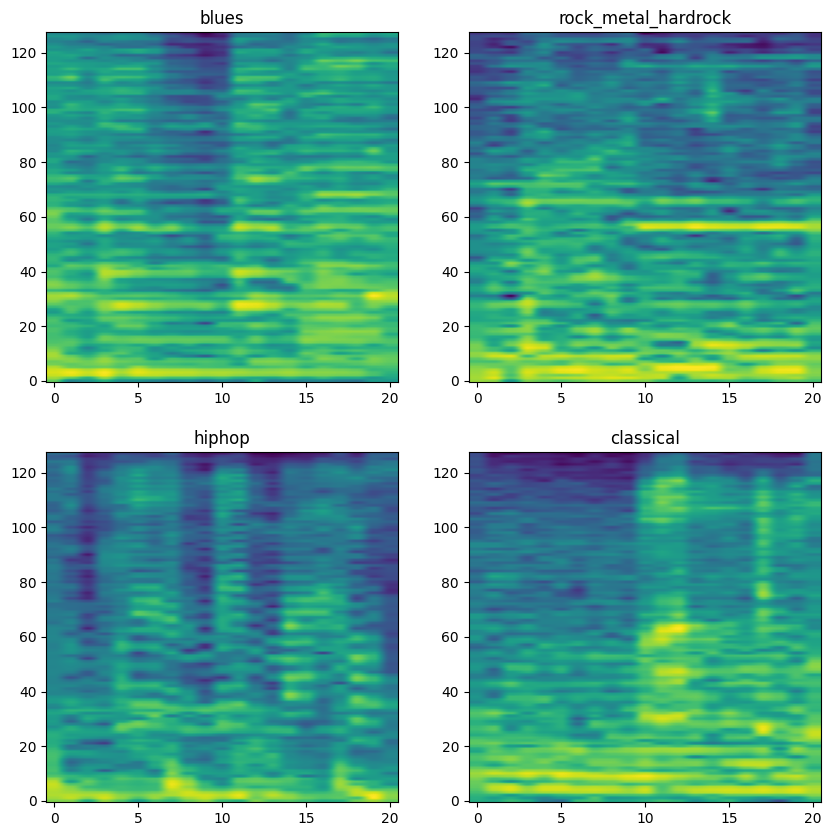

In [56]:
# Step 1

import random
import matplotlib.pyplot as plt

# Loading Training Data
x_train = np.load(main_path + '/train/melgrams/X.npy')
y_train = np.load(main_path + '/train/melgrams/labels.npy')
# Loading Test Data
x_test = np.load(main_path + '/test/melgrams/X.npy')
y_test = np.load(main_path + '/test/melgrams/labels.npy')
# Loading Validation Data
x_val = np.load(main_path + '/val/melgrams/X.npy')
y_val = np.load(main_path + '/val/melgrams/labels.npy')

# Create a list of categories
categories = np.unique(y_train)
categories = list(categories)

# Search for random samples and keep one of each category
random_samples = []
while any(categories):
    r = random.randint(1,len(x_train))
    if (y_train[r] in categories):
        categories.remove(y_train[r])
        random_samples.append((x_train[r],y_train[r])) # return the tuples so we know which graph is which genre when visualizing

plt.figure(figsize=(10, 10))
for i in range(1,len(np.unique(y_train))+1,1):
    plt.subplot(2, 2, i)
    plt.imshow(np.transpose(random_samples[i-1][0]), aspect='auto', origin='lower')
    plt.title(random_samples[i-1][1])

#########################
# Create the dictionary matching every genre to its index in the unique values of the train array
unique_values = np.unique(y_train)
replacement_dict = {value: i for i, value in enumerate(unique_values)}
# Replace the values in each of the arrays with the values from the dictionary
for i in range(len(unique_values)):
    y_train = np.where(y_train == unique_values[i], replacement_dict[unique_values[i]], y_train)
    y_test = np.where(y_test == unique_values[i], replacement_dict[unique_values[i]], y_test)
    y_val = np.where(y_val == unique_values[i], replacement_dict[unique_values[i]], y_val)
# Replace the ints encoded as strings to plain ints
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_val = y_val.astype(int)
# Create tensors from numpuarrays
x_train = torch.from_numpy(x_train).float() # There was a type mismatch float64 instead of float32
y_train = torch.from_numpy(y_train).long() # And another type mismatch for long instead of int
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()
x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).long()
# Setting the dimension of channels to 1 since the convolution it treats the number of batches as channels
x_train = torch.unsqueeze(x_train,dim=1)
x_test = torch.unsqueeze(x_test,dim=1)
x_val = torch.unsqueeze(x_val,dim=1)
# Creating datasets
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)
val_dataset = TensorDataset(x_val, y_val)
# Load on dataloders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset , batch_size=16, shuffle=False)
val_dataloader = DataLoader(val_dataset,batch_size=16, shuffle=True)

In [57]:
# Step 2

# torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
# Ορίστε ένα Συνελικτικό Νευρωνικό Δίκτυο το οποίο να αποτελείται από:
# Ακολουθία τεσσάρων συνελικτικών επιπέδων, με kernel size 5, ώστε να επιτυγχάνεται η εξής ακολουθία καναλιών: 1, 16, 32, 64, 128
# Η έξοδος του τελευταίου συνελικτικού επιπέδου να εισέρχεται σε ένα πλήρως συνδεδεμένο νευρωνικό δίκτυο 5 επιπέδων με αριθμό νευρώνων: x (διάσταση εξόδου συνελικτικού δικτύου), 1024, 256, 32, out_dim

class ConvolutionalNeuralNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNeuralNetwork, self).__init__()
        # 1, 16, 32, 64, 128
        self.convolutional = nn.Sequential(
            nn.Conv2d(1, 16, 5),   # 1 --> 16
            nn.ReLU(),
            nn.Conv2d(16, 32, 5),  # 16 -> 32
            nn.ReLU(),
            nn.Conv2d(32, 64, 5),  # 32 --> 64
            nn.ReLU(),
            nn.Conv2d(64, 128, 5), # 64 -> 128
            nn.ReLU()
        )

        self.fc = nn.Sequential(
            nn.Flatten(), # flatten so we can actually get the output size we need to classification
            nn.Linear(71680, 1024), # 71680 (size of the flat input) -> 1024
            nn.ReLU(),
            nn.Linear(1024, 256), # 1024 -> 256
            nn.ReLU(),
            nn.Linear(256, 32), # 256 -> 32
            nn.ReLU(),
            nn.Linear(32, 4) # 32 -> 4
        )

    def forward(self, x):
        conv = self.convolutional(x)
        logits = self.fc(conv)
        return logits

In [58]:
# Step 3

# set the device
device = 'cuda'
# create the model
model =  ConvolutionalNeuralNetwork().to(device)
# define the loss function
loss_fn = nn.CrossEntropyLoss()
# define the learning rate
learning_rate = 0.002
# define the optimizer object
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# define number of epochs
num_epochs = 30
# train and validate
weights_opt = train_nn_validated(num_epochs, optimizer, train_dataloader, val_dataloader, loss_fn, model, device)
model.load_state_dict(weights_opt)
evaluate_neural_network(test_dataloader, model, loss_fn, device)

Epoch:  0  loss is  1.5720282793045044 f1 is  tensor(0.1552, device='cuda:0')
Epoch:  1  loss is  1.1898818016052246 f1 is  tensor(0.3574, device='cuda:0')
Epoch:  2  loss is  1.2867900133132935 f1 is  tensor(0.3400, device='cuda:0')
Epoch:  3  loss is  1.1004523038864136 f1 is  tensor(0.3556, device='cuda:0')
Epoch:  4  loss is  1.0053749084472656 f1 is  tensor(0.5107, device='cuda:0')
Epoch:  5  loss is  0.7435398101806641 f1 is  tensor(0.4071, device='cuda:0')
Epoch:  6  loss is  0.8677475452423096 f1 is  tensor(0.5185, device='cuda:0')
Epoch:  7  loss is  1.3163425922393799 f1 is  tensor(0.5718, device='cuda:0')
Epoch:  8  loss is  1.030307412147522 f1 is  tensor(0.5932, device='cuda:0')
Epoch:  9  loss is  0.681303858757019 f1 is  tensor(0.4453, device='cuda:0')
Epoch:  10  loss is  0.7867676019668579 f1 is  tensor(0.5970, device='cuda:0')
Epoch:  11  loss is  0.617745041847229 f1 is  tensor(0.6308, device='cuda:0')
Epoch:  12  loss is  0.75356125831604 f1 is  tensor(0.6059, devic

0.6223170750548117

In [59]:
# Step 4
# Ενσωματώστε στα συνελικτικά επίπεδα max pooling με kerne size 2, και padding μεγέθους 2. Σχολιάστε την χρησιμότητα των δύο αυτών στοιχείων. Τι επίδοση πετυχαίνετε;
import torch.nn.functional as F

class ConvolutionalPoolingPadding(nn.Module):
    def __init__(self):
        super(ConvolutionalPoolingPadding, self).__init__()
        # 1, 16, 32, 64, 128

        self.conv1 = nn.Conv2d(1,16,5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.conv3 = nn.Conv2d(32, 64, 5)
        self.conv4 = nn.Conv2d(64, 128, 5)

        self.max_pool = nn.MaxPool2d(2)

        self.padding = nn.ZeroPad2d(2)

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(896, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256), # 1024 -> 256
            nn.ReLU(),
            nn.Linear(256, 32), # 256 -> 32
            nn.ReLU(),
            nn.Linear(32, 4) # 32 -> 4
        )

    def forward(self, x):
        x = self.max_pool(F.relu(self.conv1(x)))
        x = self.padding(x)
        x = self.max_pool(F.relu(self.conv2(x)))
        x = self.padding(x)
        x = self.max_pool(F.relu(self.conv3(x)))
        x = self.padding(x)
        x = self.max_pool(F.relu(self.conv4(x)))
        logits = self.fc(x)
        return logits

In [60]:
# set the device
device = 'cuda'
# create the model
model =  ConvolutionalPoolingPadding().to(device)
# define the loss function
loss_fn = nn.CrossEntropyLoss()
# define the learning rate
learning_rate = 0.002
# define the optimizer object
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# define number of epochs
num_epochs = 30
# train and validate
weights_opt = train_nn_validated(num_epochs, optimizer, train_dataloader, val_dataloader, loss_fn, model, device)
model.load_state_dict(weights_opt)
evaluate_neural_network(test_dataloader, model, loss_fn, device)

Epoch:  0  loss is  1.39388906955719 f1 is  tensor(0.0971, device='cuda:0')
Epoch:  1  loss is  1.3537627458572388 f1 is  tensor(0.2020, device='cuda:0')
Epoch:  2  loss is  1.3619335889816284 f1 is  tensor(0.3067, device='cuda:0')
Epoch:  3  loss is  1.3377914428710938 f1 is  tensor(0.2632, device='cuda:0')
Epoch:  4  loss is  1.1489452123641968 f1 is  tensor(0.3922, device='cuda:0')
Epoch:  5  loss is  1.1867855787277222 f1 is  tensor(0.4823, device='cuda:0')
Epoch:  6  loss is  0.9325932860374451 f1 is  tensor(0.2753, device='cuda:0')
Epoch:  7  loss is  1.1941405534744263 f1 is  tensor(0.4499, device='cuda:0')
Epoch:  8  loss is  1.1543018817901611 f1 is  tensor(0.4450, device='cuda:0')
Epoch:  9  loss is  0.947932779788971 f1 is  tensor(0.4453, device='cuda:0')
Epoch:  10  loss is  0.8502148389816284 f1 is  tensor(0.3632, device='cuda:0')
Epoch:  11  loss is  0.9828007817268372 f1 is  tensor(0.4558, device='cuda:0')
Epoch:  12  loss is  0.9312117695808411 f1 is  tensor(0.4948, dev

0.6315295752422709

Το padding στον αποπάνω κώδικα χρησιμοποιείται για να μπορέσουν να κρατήσουν τα layers που προκύπτουν την επιθημητή διάσταση, ενώ το pooling  κάνει την διαδικασία πιο γρήγορη μειώνοντας τις διαστάσεις (και ίσως και εξαγωγή χαρακτηριστίκων αν και δεν βλέπουμε κάποια σημαντική διαφορά στην ικανότητα γενίκευσης). Με αυτες τις δύο τεχνίκες, πετυχαίνουμε την ίδια ικανότητα γενίκευσης με μικρότερο υπολογιστικό κόστος.


*Σημειωσή: Σε μερικά σημεία στην εργασία χρησιμοποιήθηκε κώδικας των σεμιναρίων, όπως για τις κλάσεις και το loss calculation.*